# <center>Logistic Regression</center>

## Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

## Import data

In [4]:
titanic_train = pd.read_csv("datasets/titanic_train.csv")

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check the data types and numbers of rows and columns

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Check the data

In [7]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check the column names

In [8]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Check missing values

In [9]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

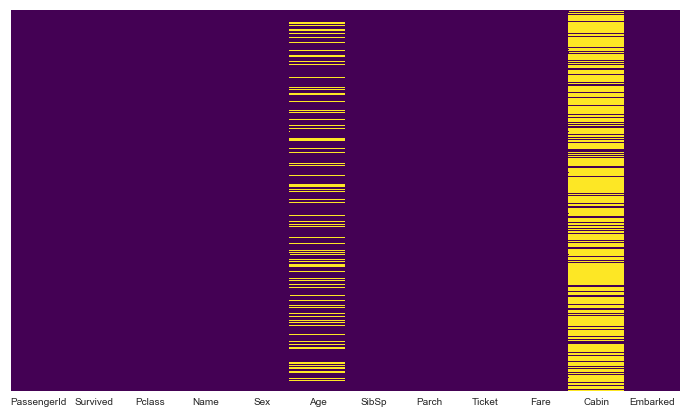

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("titanic_train_null_values.png")

## Clean the data

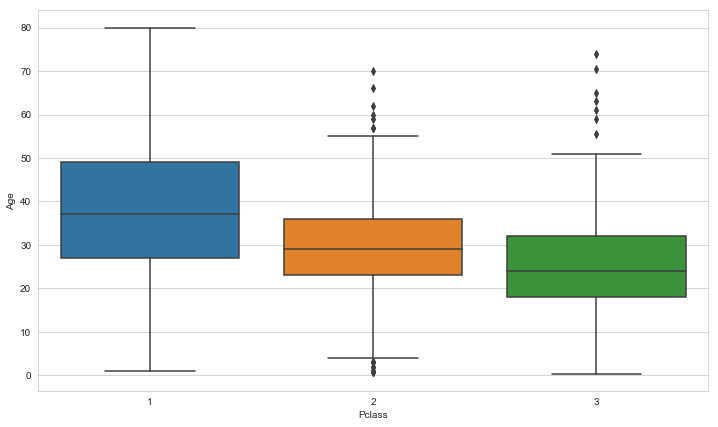

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train)
plt.savefig("boxplot_pclass.png")

## Calculate the mean of age based on Pclass

In [12]:
pclass_1_age = titanic_train['Age'][titanic_train['Pclass'] == 1].mean()
pclass_2_age = titanic_train['Age'][titanic_train['Pclass'] == 2].mean()
pclass_3_age = titanic_train['Age'][titanic_train['Pclass'] == 3].mean()

print("The mean of age with Pclass 1 is", round(pclass_1_age))
print("The mean of age with Pclass 2 is", round(pclass_2_age))
print("The mean of age with Pclass 3 is", round(pclass_3_age))

The mean of age with Pclass 1 is 38.0
The mean of age with Pclass 2 is 30.0
The mean of age with Pclass 3 is 25.0


In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [14]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

## Drop Cabin column

In [15]:
titanic_train.drop('Cabin',axis=1,inplace=True)

## Drop null values from datasets

In [16]:
titanic_train.dropna(inplace=True)

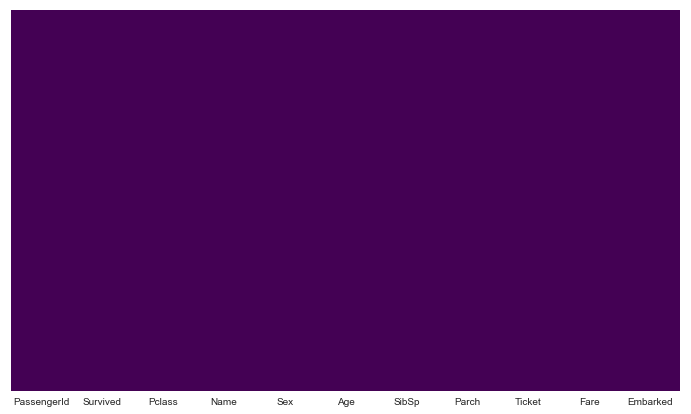

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("remove_null_values.png")

## Check classification of dependent variable, in our case is Survived

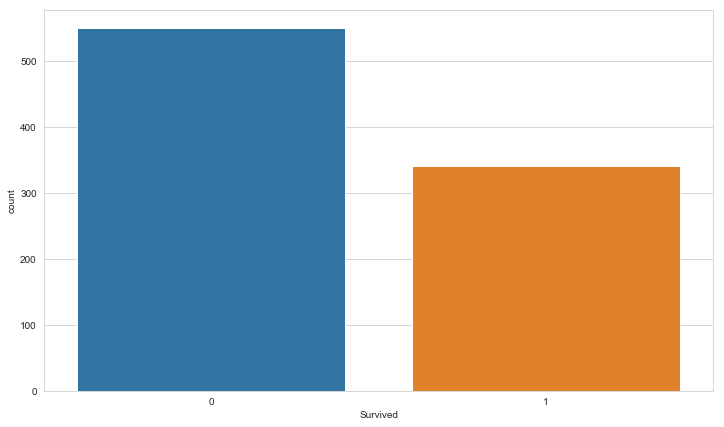

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(x='Survived',data=titanic_train)
plt.savefig("countplot_survived.png")

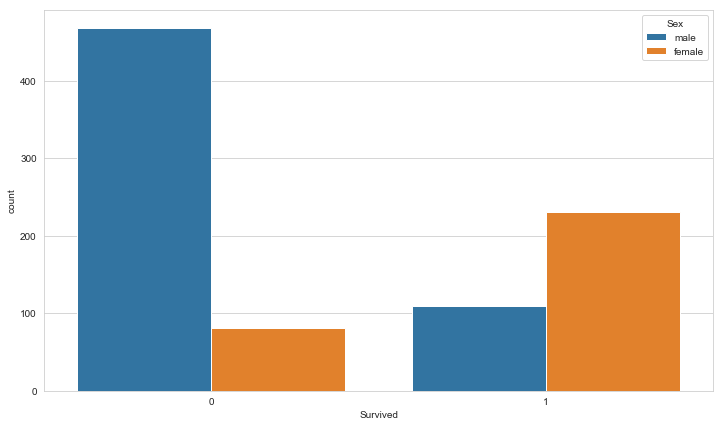

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x='Survived',hue="Sex",data=titanic_train)
plt.savefig("countplot_survived_sex.png")

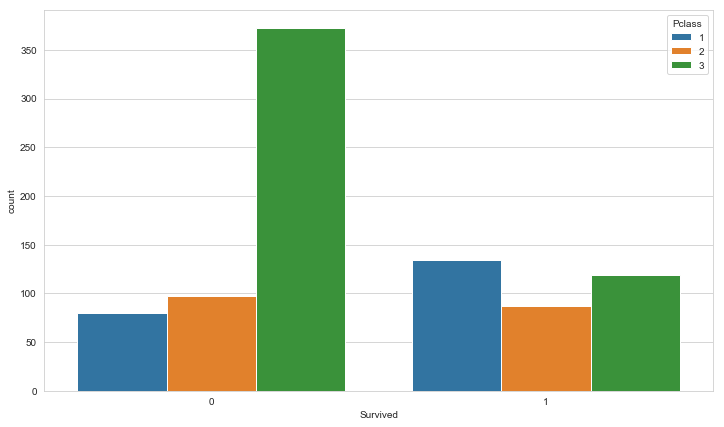

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x='Survived',hue="Pclass",data=titanic_train)
plt.savefig("countplot_survived+pclass.png")

## Check distribution of age in the data

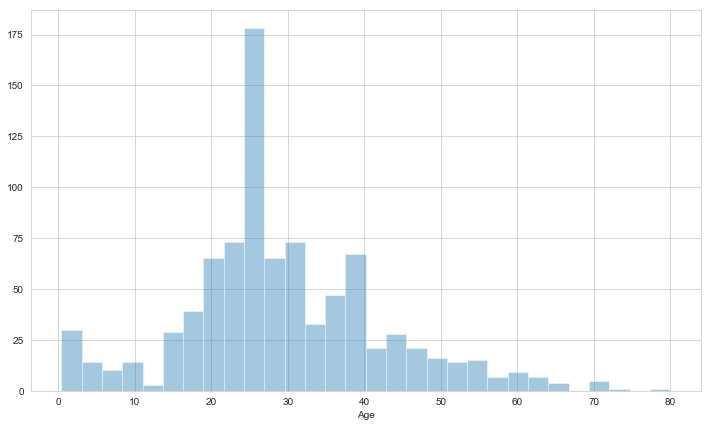

In [25]:
plt.figure(figsize=(12,7))
sns.distplot(titanic_train['Age'],kde=False,bins=30)
plt.savefig("distplot_age.png")

## Check sibling/parent column in the data

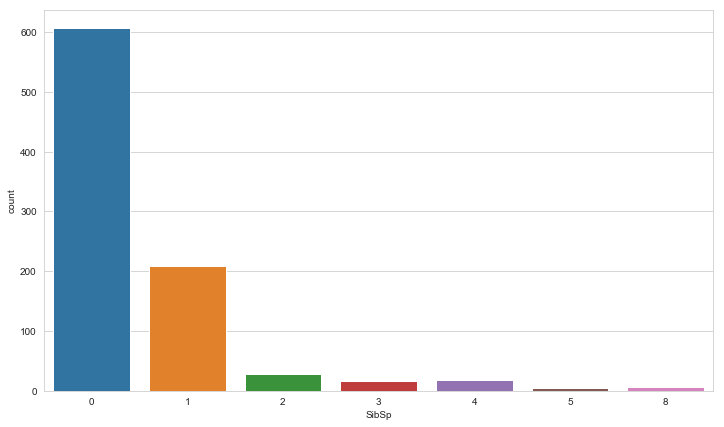

In [26]:
plt.figure(figsize=(12,7))
sns.countplot(x='SibSp',data=titanic_train)
plt.savefig("countplt_sibsp.png")

## Check distribution of Fare in the data

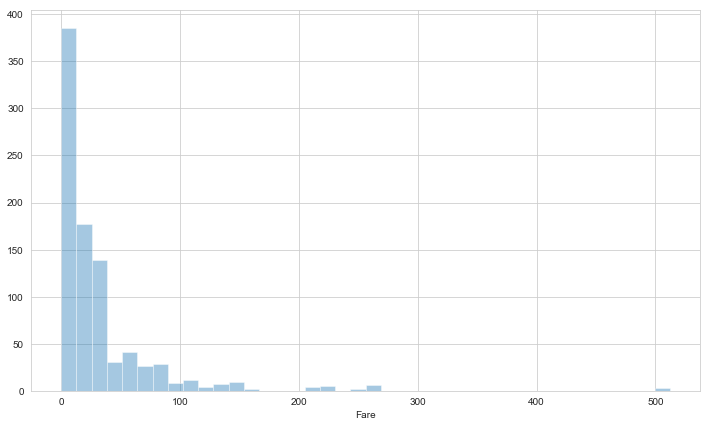

In [27]:
plt.figure(figsize=(12,7))
sns.distplot(titanic_train['Fare'].dropna(),kde=False,bins=40)
plt.savefig("distplot_fare.png")

## Create dummy variables

In [28]:
pclass = pd.get_dummies(titanic_train['Pclass'],prefix='Pclass_',drop_first=True)

In [29]:
gender = pd.get_dummies(titanic_train['Sex'],drop_first=True)

In [30]:
embarked = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [31]:
titanic_train = pd.concat([titanic_train,pclass,gender,embarked],axis=1)

In [32]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass__2,Pclass__3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


## Drop unwanted columns 

In [33]:
titanic_train.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [34]:
titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass__2,Pclass__3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


## Create X array

In [35]:
titanic_train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass__2', 'Pclass__3',
       'male', 'Q', 'S'],
      dtype='object')

In [36]:
X = titanic_train[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass__2', 'Pclass__3','male', 'Q', 'S']]

In [37]:
X.head()

,Age,SibSp,Parch,Fare,Pclass__2,Pclass__3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


## Create Y array

In [38]:
y = titanic_train['Survived']

In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Split the data into train and test

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

## Check the length of train and test dataset

In [42]:
print("Training Set of X:", len(X_train))
print("Testing Set of X:", len(X_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 622
Testing Set of X: 267
Training Set of y: 622
Testing Set of y: 267


# Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

## Create an object

In [44]:
log_model = LogisticRegression(solver='lbfgs')

## Fit the model

In [45]:
log_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions

In [46]:
predictions = log_model.predict(X_test)

## Evaluate the model

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 33  71]]
